<a href="https://colab.research.google.com/gist/teruyuki-yamasaki/f33da150556042e86383f07749e52095/lsnonlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/DS/Kaggle/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/DS/Kaggle


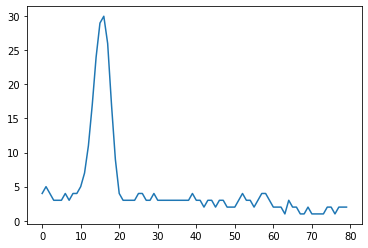

In [ ]:
y = np.load('data/waveform_1.npy')
t = np.arange(len(y))
plt.plot(t, y) 
plt.show()

In [ ]:
# One possible initial solution that we determine by inspection is:
x0 = np.array([3, 30, 15, 1], dtype=float)

def model(t, coeffs):
    return coeffs[0] + coeffs[1] * np.exp( - ((t - coeffs[2])/coeffs[3])**2)

def residuals(coeffs, y, t):
    return y - model(t, coeffs)

x, flag = leastsq(residuals, x0, args=(y, t))
print(x)

[ 2.70363341 27.82020742 15.47924562  3.05636228]


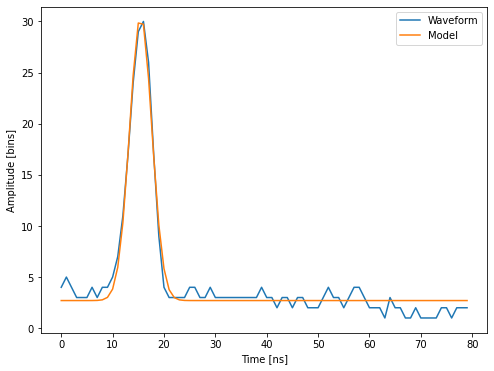

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t, y, t, model(t, x))
plt.xlabel('Time [ns]')
plt.ylabel('Amplitude [bins]')
plt.legend(['Waveform', 'Model'])
plt.show()